# 5_金融数据获取、清洗、整理和存储

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings; warnings.simplefilter('ignore') #忽略可能会出现的警告信息，警告并不是错误，可以忽略；

## 1. 从不同数据来源获取——本地

### 1.1 常用：本地文件读取

In [ ]:
with open('data/000001.csv', 'r') as f:      #推荐这种方法；
    for i in range(5):
        print(f.readline())

In [ ]:
f = open('data/000001.csv', 'r')
for i in range(5):
    print(f.readline())
f.close()

In [ ]:
with open('data/000001.csv', 'r') as f:            #未打印，不然会输出大量无用信息；
    print(f.read())

### 1.2 Python CSV模块读取

In [ ]:
import csv

In [ ]:
csv_reader = csv.reader(open('data/000001.csv', 'r'))

In [ ]:
csv_reader

In [ ]:
data = [i for i in csv_reader]               #从csv_reader中读取出数据，将其解析成list；

In [ ]:
type(data)

In [ ]:
data[:5]

### 1.3 常用：Pandas读取CSV

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('data/000001.csv')

In [ ]:
data = pd.read_csv('data/000001.csv', index_col=1,
                   parse_dates=True)                #解析日期

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
del data['Unnamed: 0']

In [ ]:
data.head()

In [ ]:
data.to_csv('000001.csv')

In [ ]:
data.to_excel('000001.xlsx')

In [ ]:
data.to_json('000001.json')

## 2. 从网络Open Source读取

### 2.1 Yahoo

In [ ]:
from pandas_datareader import data as web
import fix_yahoo_finance as yf
yf.pdr_override()

In [ ]:
#不翻墙或者网速较慢可能无法从Yahoo读取，属于正常现象；
data = web.get_data_yahoo('GS', start = '2010-01-01', end = '2012-01-01')           

In [ ]:
data.head()

In [ ]:
data.round(2).tail()

In [ ]:
data.info()

In [ ]:
data= web.get_data_yahoo('MSFT', start = '2016-01-01', end = '2017-06-30')

In [ ]:
data.head()

In [ ]:
data.round(2).tail()

In [ ]:
data= web.get_data_yahoo('600030.ss', start = '2016-01-01', end = '2017-07-01')    

In [ ]:
data.head()

In [ ]:
data = web.get_data_yahoo(['GS','MSFT'], start = '2016-01-01', end = '2017-07-01') 

In [ ]:
data.describe

In [ ]:
data.minor_xs('MSFT').head()

In [ ]:
data.minor_xs('GS').head()

### 2.2 Quandl

In [ ]:
import quandl

In [ ]:
quandl.    #tab

In [ ]:
data = quandl.get('EOD/KO',start_date='2016-1-1',end_date='2017-06-30')         #api_key =)

In [ ]:
data.head()

## 2.3 常用：Tushare

#### 获取结构化行情数据

In [1]:
# !pip install "pandas<0.25.0"
import pandas as pd
pd.__version__

'0.24.2'

In [2]:
# !pip install tushare
import tushare as ts
ts.__version__

'1.2.48'

In [3]:
hs300 = ts.get_k_data('hs300',start ='2015-01-01', end = '2017-06-30')    #get_k_data()

timed out


In [4]:
hs300.head()

,date,open,close,high,low,volume,code
0,2015-01-05,3566.09,3641.54,3669.04,3551.51,451198098.0,hs300
1,2015-01-06,3608.43,3641.06,3683.23,3587.23,420962185.0,hs300
2,2015-01-07,3620.92,3643.79,3671.19,3601.70,320191232.0,hs300
3,2015-01-08,3650.07,3559.26,3659.95,3552.10,295003045.0,hs300
4,2015-01-09,3547.57,3546.72,3689.75,3536.40,349982672.0,hs300


In [5]:
hs300.set_index('date', inplace = True)      #pd.set_index(),将df中的某一列设置成为索引；
hs300.head()

,open,close,high,low,volume,code
date,,,,,,
2015-01-05,3566.09,3641.54,3669.04,3551.51,451198098.0,hs300
2015-01-06,3608.43,3641.06,3683.23,3587.23,420962185.0,hs300
2015-01-07,3620.92,3643.79,3671.19,3601.70,320191232.0,hs300
2015-01-08,3650.07,3559.26,3659.95,3552.10,295003045.0,hs300
2015-01-09,3547.57,3546.72,3689.75,3536.40,349982672.0,hs300


In [7]:
%matplotlib inline
# 显示图像

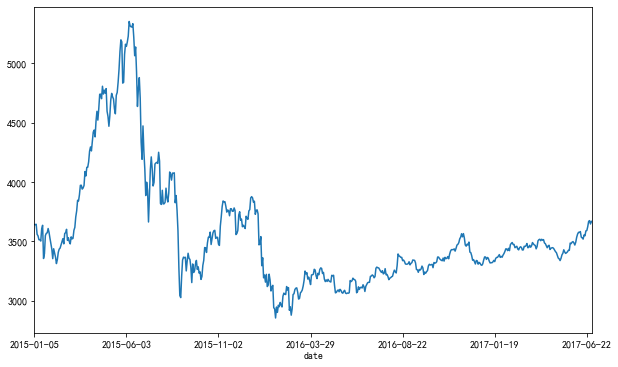

In [8]:
hs300['close'].plot(figsize=(10, 6))

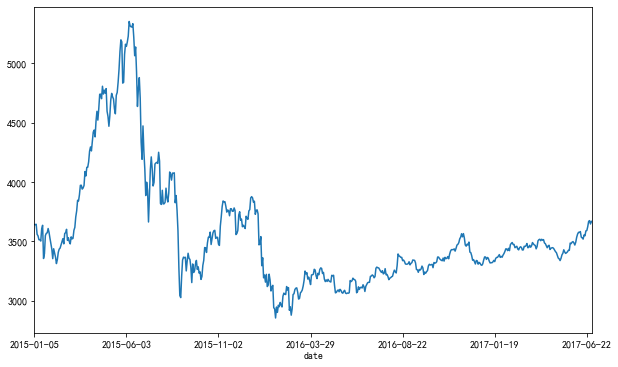

In [9]:
hs300.close.plot(figsize=(10, 6))     #等价；

In [10]:
data = ts.get_k_data('600030') #默认前复权价格；
data.head()

,date,open,close,high,low,volume,code
0,2017-05-31,15.785,15.709,16.014,15.556,799278.0,600030
1,2017-06-01,15.689,15.642,15.833,15.623,583407.0,600030
2,2017-06-02,15.651,15.651,15.814,15.603,547821.0,600030
3,2017-06-05,15.632,15.489,15.689,15.441,477573.0,600030
4,2017-06-06,15.498,15.527,15.594,15.412,339213.0,600030


In [11]:
data2 = ts.get_k_data('600030', autype='hfq') #不复权
data2.head()

,date,open,close,high,low,volume,code
0,2017-05-31,63.071,62.765,63.987,62.154,799278.0,600030
1,2017-06-01,62.689,62.498,63.262,62.422,583407.0,600030
2,2017-06-02,62.536,62.536,63.185,62.345,547821.0,600030
3,2017-06-05,62.460,61.887,62.689,61.696,477573.0,600030
4,2017-06-06,61.925,62.040,62.307,61.582,339213.0,600030


In [12]:
data3 = ts.get_k_data('600030', ktype = '5') #两个日期之间的前复权数据
data3.head()

,date,open,close,high,low,volume,amount,turnoverratio,code
0,2020-01-09 14:55,25.39,25.42,25.42,25.37,42455.0,{},4.3257,600030
1,2020-01-09 15:00,25.42,25.44,25.44,25.41,47277.0,{},4.8170,600030
2,2020-01-10 09:35,25.96,25.78,26.09,25.75,423696.0,{},43.1697,600030
3,2020-01-10 09:40,25.79,25.65,25.79,25.65,113674.0,{},11.5821,600030
4,2020-01-10 09:45,25.65,25.76,25.79,25.63,87914.0,{},8.9574,600030


In [13]:
data = ts.get_k_data(['600030','000001'])    #tushare API接口不支持多股票数据；
data

""


#### Tushare获得历史逐笔交易数据

In [34]:
df = ts.get_tick_data('600030',date='2017-07-28')

In [48]:
if df is not None:
    df.sort_index(inplace = True, ascending = False)
    print(df.head(10))
else:
    print('数据没抓取到')

数据没抓取到


#### Tushare获得当前主流指数列表

In [16]:
df = ts.get_index()
df.head()   #显示部分主流指数

,code,name,change,open,preclose,close,high,low,volume,amount
0,000001,上证指数,-2.75,3037.9524,3060.7545,2976.5281,3045.0406,2955.3460,272763234,3274.9036
1,000002,Ａ股指数,-2.75,3183.1934,3207.1201,3118.9177,3190.7055,3096.7191,272375143,3272.4163
2,000003,Ｂ股指数,-3.47,256.8284,257.5201,248.5793,256.8284,246.4306,388091,2.4873
3,000008,综合指数,-2.51,2900.4617,2923.3237,2849.9183,2903.4764,2834.5232,61940755,716.1844
4,000009,上证380,-3.43,4940.7169,4978.5663,4808.0381,4959.2677,4770.1956,57463666,700.2298


#### Tushare获得股票的基本面信息

In [17]:
df = ts.get_stock_basics()         #基本面数据
date = df.ix['600848']['timeToMarket']
date

D:\install\miniconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


19940324

In [18]:
date = df.loc['600030']['timeToMarket']        #ix即将要被取消；
date

20030106

#### 获得所有股票基本面数据

In [19]:
data = ts.get_stock_basics()     #get_stocl_basics()
data.head()

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
688159,N有方,软件服务,深圳,134.49,0.19,0.92,8.03,6.18,0.06,2.82,...,9.81,5.77,20200123,1.23,1.34,0.00,0.00,22.88,5.66,19486.0
688266,N泽璟,化学制药,江苏,0.00,0.55,2.40,2.97,1.17,0.56,2.86,...,8.20,9.10,20200123,-4.09,-1.70,0.00,0.00,0.00,0.00,36598.0
300815,N玉禾田,环境保护,安徽,18.46,0.35,1.38,24.84,14.23,5.47,0.28,...,13.60,3.13,20200123,7.88,5.70,0.00,0.00,21.73,9.09,68996.0
688068,热景生物,医疗保健,北京,251.27,0.14,0.62,6.98,5.45,1.25,4.46,...,10.04,7.09,20190930,1.06,1.71,0.00,0.00,72.54,9.60,10316.0
600789,鲁抗医药,化学制药,山东,73.98,8.52,8.80,70.58,27.59,22.30,16.25,...,3.42,3.33,19970226,3.51,0.40,15.07,-29.42,28.21,3.72,112796.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3789 entries, 688159 to 002604
Data columns (total 22 columns):
name                3789 non-null object
industry            3789 non-null object
area                3789 non-null object
pe                  3789 non-null float64
outstanding         3789 non-null float64
totals              3789 non-null float64
totalAssets         3789 non-null float64
liquidAssets        3789 non-null float64
fixedAssets         3789 non-null float64
reserved            3789 non-null float64
reservedPerShare    3789 non-null float64
esp                 3789 non-null float64
bvps                3789 non-null float64
pb                  3789 non-null float64
timeToMarket        3789 non-null int64
undp                3789 non-null float64
perundp             3789 non-null float64
rev                 3789 non-null float64
profit              3789 non-null float64
gpr                 3789 non-null float64
npr                 3789 non-null float64
holders       

In [21]:
data.ix['600030'][['pe','esp']]     #pandas数据选择的复习；

D:\install\miniconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


pe     20.64
esp    0.868
Name: 600030, dtype: object

In [22]:
data.loc['600030'][['pe','esp']]

pe     20.64
esp    0.868
Name: 600030, dtype: object

In [23]:
data = ts.get_profit_data(2017,1)    #获得公司盈利数据；

[Getting data:]###########################################################

In [24]:
data.head()

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,600423,ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
2,000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,002893,华通热力,25.83,21.81,32.2225,112.7380,1.2526,516.6846,5.7409


In [25]:
data.set_index('code', inplace = True)

In [26]:
data.head()

,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
code,,,,,,,,
600423,ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
002893,华通热力,25.83,21.81,32.2225,112.7380,1.2526,516.6846,5.7409


In [27]:
data.ix['600030'][['roe','net_profit_ratio']]

D:\install\miniconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


roe                 1.57
net_profit_ratio    26.7
Name: 600030, dtype: object

#### 获得非结构化新闻、舆情数据

In [28]:
ts.get_latest_news(top=5,show_content=True) #显示最新5条新闻，并打印出新闻内容

list index out of range


#### 获取龙虎榜信息

In [29]:
top_list = ts.top_list('2017-08-11')
top_list.head()

,code,name,pchange,amount,buy,sell,reason,bratio,sratio,date
0,000519,中兵红箭,5.7881,10331.03,8276.97,2054.06,日涨幅偏离值达到7%的前五只证券,0.12,0.03,2017-08-11
1,000615,京汉股份,8.6142,29848.69,23399.14,6449.55,日换手率达到20%的前五只证券,0.15,0.04,2017-08-11
2,000615,京汉股份,8.6142,29848.69,23399.14,6449.55,日涨幅偏离值达到7%的前五只证券,0.15,0.04,2017-08-11
3,000717,韶钢松山,-10.0314,14525.38,5268.84,9256.54,日跌幅偏离值达到7%的前五只证券,0.11,0.19,2017-08-11
4,000751,锌业股份,-9.9688,13448.01,4510.43,8937.59,日跌幅偏离值达到7%的前五只证券,0.05,0.10,2017-08-11


#### get_lastest_news

In [49]:
ts.get_latest_news()

list index out of range


参考 https://github.com/waditu/tushare/issues/765

> 一年后老版将不再维护。

### 2.4 常用：优矿

可以通过优矿下载数据，并保存成CSV文件下载再导入；

In [ ]:
# 获得某一只当天的tick数据；
data=DataAPI.MktTickRTIntraDayGet(securityID=u"000001.XSHE",startTime=u"09:30",endTime=u"15:00",field=u"",pandas="1")
data.to_csv('tick_data.csv')   #下载并保存数据以供分析；

In [ ]:
# 获得某一些股票具体某一天的因子数据；
DataAPI.MktStockFactorsOneDayGet(tradeDate=u"20170630",secID=u"",ticker=u"000001,600030",field=u"ticker,ROE,PE,PB",pandas="1")

In [ ]:
#某一只股票一段时间之内的因子数据；
DataAPI.MktStockFactorsDateRangeGet(secID=u"",ticker=u"000001",beginDate=u"20100101",endDate=u"20170616",field=u"tradeDate,ROE,PE,PB",pandas="1")

In [ ]:
# 获取交易日历
start_date = '2014-01-01'
end_date = '2017-07-01'
trading_date = DataAPI.TradeCalGet(exchangeCD=u"XSHG",beginDate=u"",endDate=u"",field=u"",pandas="1")
# trading_date.to_csv('trading_date.csv')
# 筛选2013年到2016年每月最后一个交易日的日期
print(trading_date)
month_end = trading_date[(trading_date['isMonthEnd']==1) & (trading_date['calendarDate']>start_date) & (trading_date['calendarDate']<end_date)]['calendarDate'].tolist()
print month_end

In [ ]:
# 获取某个日期以前上市的，正常交易或暂停交易的股票代码，格式为xxxxxx.XSHE或xxxxxx.XSHG
date = '2017-10-01'
stock_basics = DataAPI.EquGet(equTypeCD=u"A",secID=u"",ticker=u"",listStatusCD=u"",field=u"",pandas="1")
# stock_basics.to_csv('data/stock_basics.csv', encoding='GB18030')
valid_stocks = stock_basics.loc[(stock_basics['listDate']<date) & (stock_basics['listStatusCD'].isin(['L','S']))]['secID']
# valid_stocks.to_csv('data/valid_stocks.csv', encoding='GB18030')
print valid_stocks

In [ ]:
# 获取对应股票在对应日期的多个因子值
import pandas as pd

mkt_value = [DataAPI.MktStockFactorsOneDayGet(tradeDate=date,secID=valid_stocks,ticker=u"",field=["secID", 'LCAP','PE', 'REVS20', 'tradeDate'],pandas="1").set_index(['tradeDate', 'secID']) for date in month_end]
lcap = pd.concat(mkt_value, axis=0)
# lcap.to_csv('data/raw_factors.csv')
print lcap.head(5)

In [ ]:
# 每个月最后一个交易日计算市值最小的20只股票
import pandas as pd

min_cap_pool = {date: lcap['LCAP'][date].sort_values(ascending=True).index[:20] for date in month_end}
min_cap_pool = pd.DataFrame(min_cap_pool)
print min_cap_pool

## 3. 数据存储

HDF5

Hierarchical Data Format(HDF)是一种针对大量数据进行组织和存储的文件格式。

经历了20多年的发展，HDF格式的最新版本是HDF5

In [ ]:
import numpy as np
import pandas as pd
import tushare as ts

In [ ]:
%time data = np.random.randn(500000,10)

In [ ]:
data.shape

In [ ]:
data = pd.DataFrame(data)

In [ ]:
data.head()

In [ ]:
hdf5 = pd.HDFStore('data/random_number.h5', 'w')        #pd.HDFStore(),'w':write模式；知识生成了HDF5对象/文件；

In [ ]:
hdf5.      #tab

In [ ]:
hdf5.open()       #打开刚刚创建的HDF5的文件；

In [ ]:
hdf5['data'] = data      #设置主键的名字，名字叫做data；把data随机数数据已经存进HDF5文件；

In [ ]:
hdf5.close()

In [ ]:
hdf5 = pd.HDFStore('data/random_number.h5', 'r')      #'r'读取模式；

In [ ]:
data_read = hdf5['data']     #读取hdf5中的数据并赋值给data_read

In [ ]:
data_read.head()

In [ ]:
hdf5.close()

In [ ]:
profit_data = ts.get_profit_data(2017,1)

In [ ]:
profit_data.head()

In [ ]:
profit_data.info()

In [ ]:
hdf5 = pd.HDFStore('profit_data.h5', 'w')

In [ ]:
hdf5['data'] = profit_data     #把刚刚从tushare上调取的利润数据存进HDF5文件里；

In [ ]:
hdf5.close()

In [ ]:
hdf5 = pd.HDFStore('profit_data.h5', 'r')

In [ ]:
data_profit = hdf5['data']

In [ ]:
data_profit.head(5)

In [ ]:
data_profit[data_profit['roe']>15].head()

In [ ]:
data_profit[(data_profit['roe']>15) & (data_profit['net_profit_ratio']>20)]      #数据库调取数据并进行多条件选股；


声明：本资料仅限内部研究使用，切勿外传。